# 히스토그램 (Histogram)

## Histogram

- 이미지의 밝기의 분포를 그래프로 표현한 방식

- 이미지의 전체의 밝기 분포와 채도(밝고 어두움)을 알 수 있음

<img src="https://opencv-python.readthedocs.io/en/latest/_images/image013.jpg">

<sub>[이미지 출처] https://www.cambridgeincolour.com/tutorials/histograms1.htm</sub>

<br>

## 용어 설명

- BINS 
  
  - 히스토그램 그래프의 X축의 간격  
    위 그림의 경우에는 0 ~ 255를 표현하였기 때문에 BINS값은 256이 된다.  
    BINS값이 16이면 0 ~ 15, 16 ~ 31..., 240 ~ 255와 같이 X축이 16개로 표현  
    OpenCV에서는 BINS를 histSize 라고 표현

- DIMS 

  - 이미지에서 조사하고자하는 값을 의미  
    빛의 강도를 조사할 것인지, RGB값을 조사할 것인지를 결정

- RANGE 

  - 측정하고자하는 값의 범위  

<br>

- `cv2.calcHist()`

  - Parameters
    - `image` : 분석대상 이미지(uint8 or float32 type). Array형태.

    - `channels` : 분석 채널(X축의 대상)
    
      - 이미지가 graysacle이면 [0], color 이미지이면 [0],[0,1] 형태(1 : Blue, 2: Green, 3: Red)

    - `mask` : 이미지의 분석영역. None이면 전체 영역.

    - `histSize` : BINS 값. [256]

    - `ranges` : Range값. [0,256]


* flower1.jpg

<sub>[이미지 출처] https://pixabay.com/ko/photos/%EB%A1%9C%ED%84%B0%EC%8A%A4-%EA%BD%83-%EC%97%AC%EB%A6%84-%EC%A0%A0-%EC%9E%90%EC%97%B0-978659/</sub>

* flower2.jpg

<sub>[이미지 출처] https://pixabay.com/ko/photos/%EC%A0%95%EC%9B%90-%EA%BD%83-%EB%82%98%EB%B9%84-19830/</sub>

In [1]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
up = files.upload()

Saving flower1.jpg to flower1.jpg
Saving flower2.jpg to flower2.jpg


In [3]:
flower1 = cv2.imread('flower1.jpg')[:,:,::-1]
flower2 = cv2.imread('flower2.jpg')[:,:,::-1]
flower1.shape, flower2.shape

((426, 640, 3), (425, 640, 3))

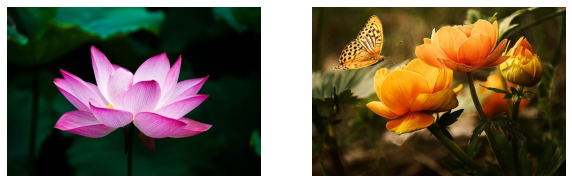

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(flower1), plt.axis('off')
plt.subplot(122), plt.imshow(flower2), plt.axis('off')
plt.show()

In [5]:
img1 = cv2.imread('flower1.jpg', 0)
img2 = cv2.imread('flower2.jpg', 0)
hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

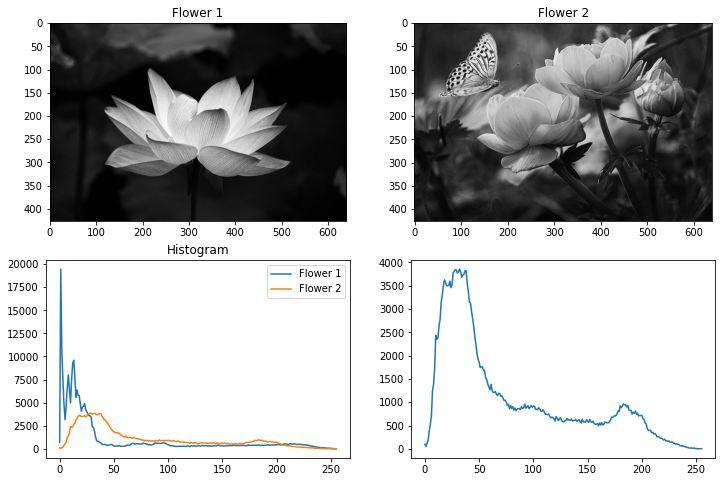

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(img1, 'gray'), plt.title('Flower 1')
plt.subplot(222), plt.imshow(img2, 'gray'), plt.title('Flower 2')
plt.subplot(223), plt.plot(hist1, label='Flower 1'), plt.plot(hist2, label='Flower 2')
plt.legend(), plt.title('Histogram')
plt.subplot(224), plt.plot(hist2)
plt.show()

## Mask를 적용한 히스토그램

![](https://cdn.pixabay.com/photo/2020/03/12/04/07/cat-4923824_960_720.jpg)

  <sub>[이미지 출처] https://pixabay.com/photos/cat-pet-feline-animal-4923824/</sub>

In [7]:
up = files.upload()

Saving cat.jpg to cat.jpg


In [8]:
cat = cv2.imread('cat.jpg')[:,:,::-1]
cat.shape

(427, 640, 3)

In [9]:
mask = np.zeros(cat.shape[:-1], np.uint8)
mask[150:400, 260:600] = 255

In [10]:
masked_img = cv2.bitwise_and(cat, cat, mask=mask)

In [11]:
hist = cv2.calcHist([cat], [1], None, [256], [0, 256])
hist_mask = cv2.calcHist([cat], [1], mask, [256], [0, 256])

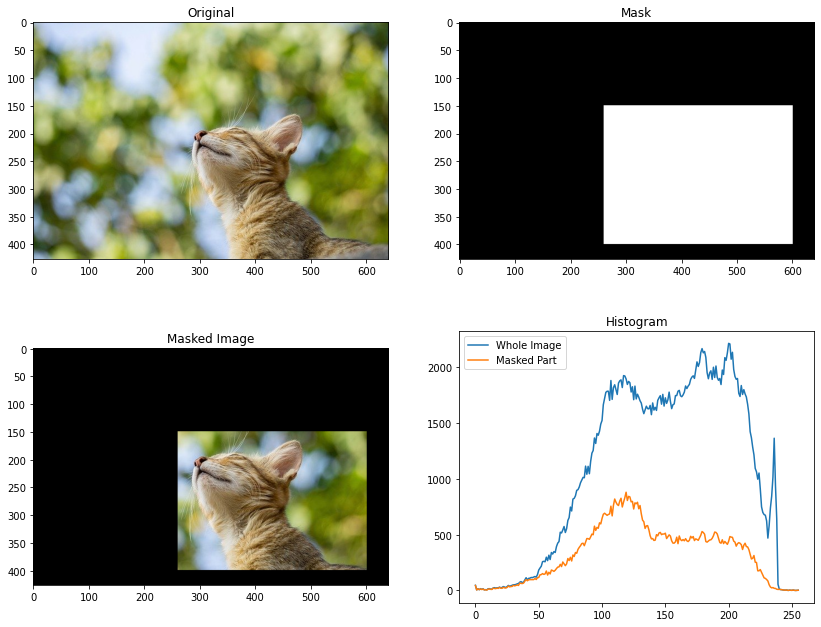

In [12]:
plt.figure(figsize=(14, 11))
plt.subplot(221), plt.imshow(cat, 'gray'), plt.title('Original')
plt.subplot(222), plt.imshow(mask, 'gray'), plt.title('Mask')
plt.subplot(223), plt.imshow(masked_img, 'gray'), plt.title('Masked Image')
plt.subplot(224), plt.plot(hist, label='Whole Image'), plt.plot(hist_mask, label='Masked Part')
plt.legend(), plt.title('Histogram')
plt.show()

## 히스토그램 평탄화

- 이미지의 히스토그램이 특정영역에 너무 집중되어 있으면 contrast가 낮아 좋은 이미지라고 할 수 없음

- 전체 영역에 골고루 분포가 되어 있을 때 좋은 이미지라고 할 수 있는데, 아래 히스토그램을 보면 좌측 처럼 특정 영역에 집중되어 있는 분포를 오른쪽 처럼 골고루 분포하도록 하는 작업을 Histogram Equalization 이라고 함

- (참고) 이론적인 방법

  - 이미지의 각 픽셀의 cumulative distribution function(cdf)값을 구하고 Histogram Equalization 공식에 대입하여 0 ~ 255 사이의 값으로 변환

  - 이렇게 새롭게 구해진 값으로 이미지를 표현하면 균일화된 이미지를 얻을 수 있음

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Histogrammeinebnung.png/600px-Histogrammeinebnung.png">

  <sub>[이미지 출처] https://en.wikipedia.org/wiki/Histogram_equalization</sub>

- Numpy를 활용하여 균일화 작업 // 생략

* taiwan.jpg

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EB%8C%80%EB%A7%8C-%EB%8F%84%EC%8B%9C-%EB%8F%84%EC%8B%9C-%ED%92%8D%EA%B2%BD-%EC%97%AC%ED%96%89-5460063/</sub>

- OpenCV 함수로 간단하게 처리

In [39]:
up = files.upload()

Saving taiwan.jpg to taiwan (1).jpg


In [40]:
taiwan = cv2.imread('taiwan.jpg', 0)
taiwan.shape

(427, 640)

In [41]:
img = cv2.equalizeHist(taiwan)
hist1 = cv2.calcHist([taiwan], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img], [0], None, [256], [0, 256])

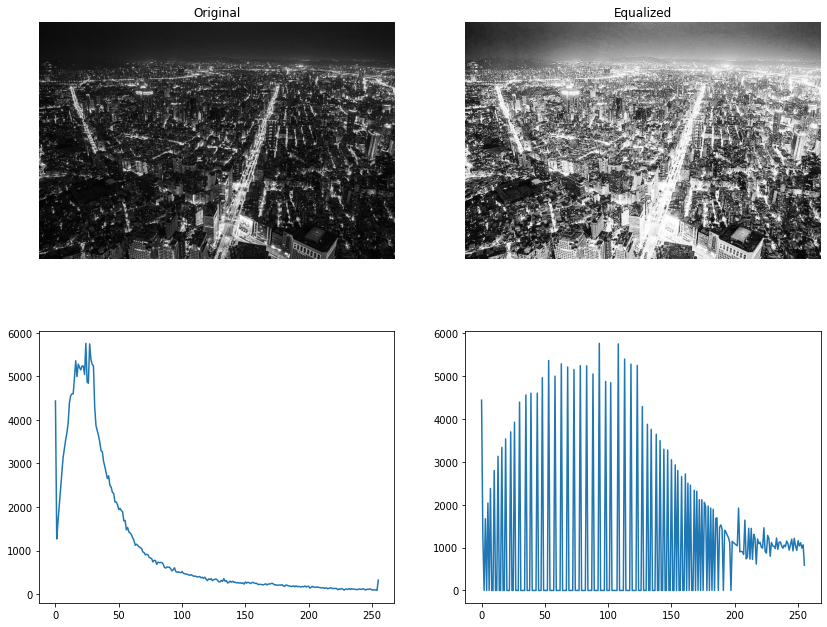

In [42]:
plt.figure(figsize=(14, 11))
plt.subplot(221), plt.imshow(taiwan, 'gray'), plt.title('Original'), plt.axis('off')
plt.subplot(222), plt.imshow(img, 'gray'), plt.title('Equalized'), plt.axis('off')
plt.subplot(223), plt.plot(hist1)
plt.subplot(224), plt.plot(hist2)
plt.show()

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

- 지금까지의 처리는 이미지의 전체적인 부분에 균일화를 적용

- 하지만 일반적인 이미지는 밝은 부분과 어두운 부분이 섞여 있기 때문에 전체에 적용하는 것은 그렇게 유용하지 않음

- 이미지
  - 'keyboard.png'

  ![](https://cdn.pixabay.com/photo/2015/08/13/01/00/keyboard-886462_960_720.jpg)
  
  <sub>[이미지 출처] https://pixabay.com/ko/photos/%ED%82%A4%EB%B3%B4%EB%93%9C-%EC%BB%B4%ED%93%A8%ED%84%B0-%ED%82%A4-%ED%99%94%EC%9D%B4%ED%8A%B8-886462/</sub>

In [17]:
up = files.upload()

Saving keyboard.jpg to keyboard.jpg


In [20]:
keyboard = cv2.imread('keyboard.jpg', 0)
keyboard.shape

(360, 640)

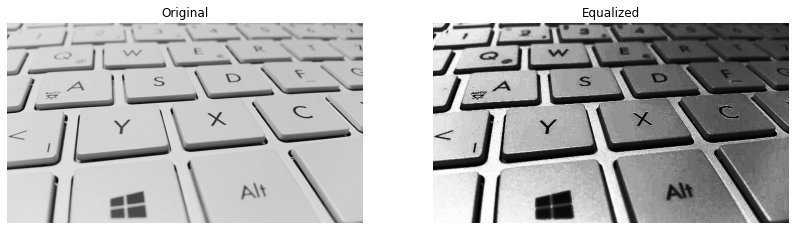

In [22]:
img = cv2.equalizeHist(keyboard)
plt.figure(figsize=(14, 6))
plt.subplot(121), plt.imshow(keyboard, 'gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(img, 'gray'), plt.title('Equalized'), plt.axis('off')
plt.show()

- 위 결과에서 주변의 어두운 부분은 균일화가 적용되어 밝아졌지만, 가운데 이미지는 너무 밝아져 경계선을 알아볼 수 없게 되어버림

- 이 문제를 해결하기 위해서 `adaptive histogram equalization`을 적용하게 됨
  - 즉, 이미지를 작은 title형태로 나누어 그 title안에서 Equalization을 적용하는 방식
  
  - 작은 영역이다 보니 작은 노이즈(극단적으로 어둡거나, 밝은 영역)가 있으면 이것이 반영이 되어 원하는 결과를 얻을 수 없게 됨
  
  - 이 문제를 피하기 위해서 `contrast limit`라는 값을 적용하여 이 값을 넘어가는 경우는 그 영역은 다른 영역에 균일하게 배분하여 적용

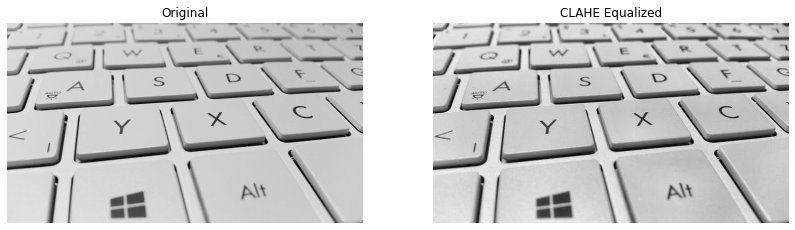

In [25]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img2 = clahe.apply(keyboard)
plt.figure(figsize=(14, 6))
plt.subplot(121), plt.imshow(keyboard, 'gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(img2, 'gray'), plt.title('CLAHE Equalized'), plt.axis('off')
plt.show()

## 2D Histogram

- 지금까지 Histogram은 1차원으로 grayscale 이미지의 pixel의 강도, 즉 빛의 세기를 분석한 결과

- 2D Histogrm 은 Color 이미지의 Hue(색상) & Saturation(채도)을 동시에 분석하는 방법

- 색상과 채도를 분석하기 때문에 HSV Format으로 변환해야 함

- `cv2.calcHist()`

  - Parameters
    - `image` : HSV로 변환된 이미지

    - `channel` : 0-> Hue, 1-> Saturation

    - `bins` : [180,256] 첫번째는 Hue, 두번째는 Saturation

    - `range` : [0,180,0,256] : Hue(0~180), Saturation(0,256)



- 이미지

  - canal.jpg

  <img src="https://cdn.pixabay.com/photo/2020/08/14/15/22/canal-5488271_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/photos/canal-boats-buildings-reflection-5488271/</sub>

In [28]:
up = files.upload()

Saving canal.jpg to canal.jpg


In [36]:
canal = cv2.imread('canal.jpg')
hsv = cv2.cvtColor(canal, cv2.COLOR_BGR2HSV)
hsv.shape

(427, 640, 3)

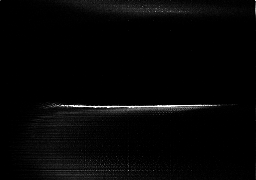

In [37]:
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
cv2_imshow(hist)

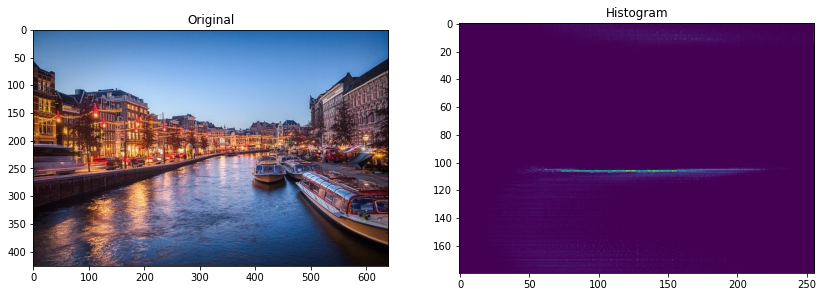

In [38]:
canal = canal[:,:,::-1]
plt.figure(figsize=(14, 6))
plt.subplot(121), plt.imshow(canal), plt.title('Original')
plt.subplot(122), plt.imshow(hist), plt.title('Histogram')
plt.show()

- 위 Histogram을 보면 X축은 Saturation, Y축은 Hue값을 나타냄

- Y축을 보면 100근처에 값이 모여 있는 것을 알 수 있음
- HSV모델에서 H가 100이면 하늘색
- 이 이미지는 하늘색이 많이 분포되어 있다는 것을 2D Histogram을 통해서 알 수 있음
